<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Polyakov-Alexander-branch/Polyakov%20Alexander/Classification_of_eyeglass_frames_fit_Autokeras_model_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация оправ очков

## Установка библиотек

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator

## Подключение диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH='/content/drive/MyDrive/AI/datasets/plastIron/'

## Модель 1

config

In [ ]:
batch_size = 30
epochs = 30
image_size = (320, 240)

Genertor

In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Нормализация пикселей
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% на валидацию
)

# Генератора обучающей выборки
train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # два класса
    classes=['iron', 'plastic'],  # Список названий классов
    subset='training'  # для обучения используется только часть данных
)

# Генератора валидационной выборки
validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=['iron', 'plastic'],
    subset='validation'  # Используем только часть данных для валидации
)

Found 716 images belonging to 2 classes.
Found 178 images belonging to 2 classes.


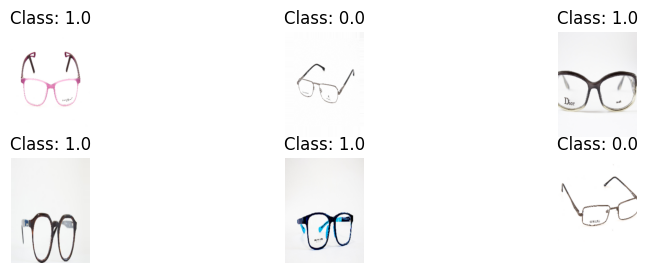

In [ ]:
# Получение пакета изображений и меток из генератора
images, labels = next(train_generator)

# Отобразить несколько изображений из пакета
plt.figure(figsize=(10, 3))
for index in range(len(images[:6])):
    plt.subplot(2, 3, index + 1)
    plt.imshow(images[index])
    plt.title('Class: ' + str(labels[index]))
    plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Normalization

def create_custom_model(input_shape=(320, 240, 3)):
    # Input layer
    inputs = Input(shape=input_shape, name="input_1")

    # Cast to float32 layer
    casted_inputs = tf.cast(inputs, tf.float32, name="cast_to_float32")

    # Normalization layer
    normalized_inputs = Normalization()(casted_inputs)

    # Convolutional layers
    conv1 = Conv2D(32, (3, 3), activation="relu", name="conv2d")(normalized_inputs)
    conv2 = Conv2D(64, (3, 3), activation="relu", name="conv2d_1")(conv1)

    # Max pooling layer
    max_pool = MaxPooling2D((2, 2), name="max_pooling2d")(conv2)

    # Dropout layer
    dropout1 = Dropout(0.5, name="dropout")(max_pool)

    # Flatten layer
    flattened = Flatten()(dropout1)

    # Another dropout layer
    dropout2 = Dropout(0.5, name="dropout_1")(flattened)

    # Fully connected (dense) layer
    dense = Dense(1, activation="linear", name="dense")(dropout2)

    # Output layer (classification head)
    output = tf.keras.layers.Activation("sigmoid", name="classification_head_1")(dense)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=output, name="custom_model")

    return model

# Create the model
custom_model = create_custom_model()

# Display model summary
custom_model.summary()

Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 240, 3)]     0         
                                                                 
 tf.cast_9 (TFOpLambda)      (None, 320, 240, 3)       0         
                                                                 
 normalization_9 (Normalizat  (None, 320, 240, 3)      7         
 ion)                                                            
                                                                 
 conv2d (Conv2D)             (None, 318, 238, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 316, 236, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 158, 118, 64)     0         
 )                                                    

Epoch 1/30
23/23 [==============================] - ETA: 0s - loss: 3.3325 - accuracy: 0.5408
Epoch 1: val_accuracy improved from -inf to 0.54000, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_7_1.h5
23/23 [==============================] - 38s 2s/step - loss: 3.3325 - accuracy: 0.5408 - val_loss: 0.6214 - val_accuracy: 0.5400
Epoch 2/30
23/23 [==============================] - ETA: 0s - loss: 0.6113 - accuracy: 0.5802
Epoch 2: val_accuracy improved from 0.54000 to 0.54667, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_7_1.h5
23/23 [==============================] - 36s 2s/step - loss: 0.6113 - accuracy: 0.5802 - val_loss: 0.5524 - val_accuracy: 0.5467
Epoch 3/30
23/23 [==============================] - ETA: 0s - loss: 0.5693 - accuracy: 0.6327
Epoch 3: val_accuracy improved from 0.54667 to 0.80667, saving model to /content/drive/MyDrive/AI/datasets/plastIron/best_models/best_model_gen_7_1.h5
23/23 [===

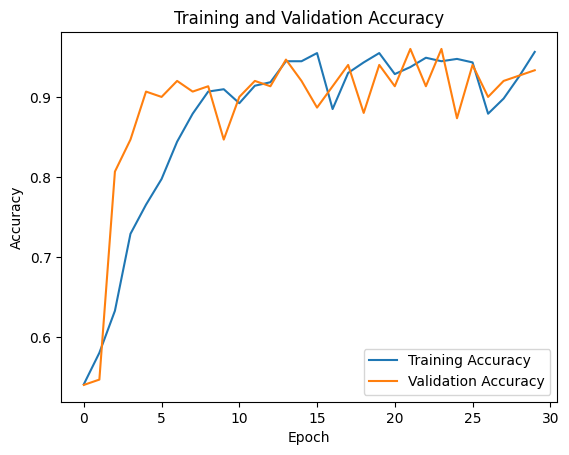

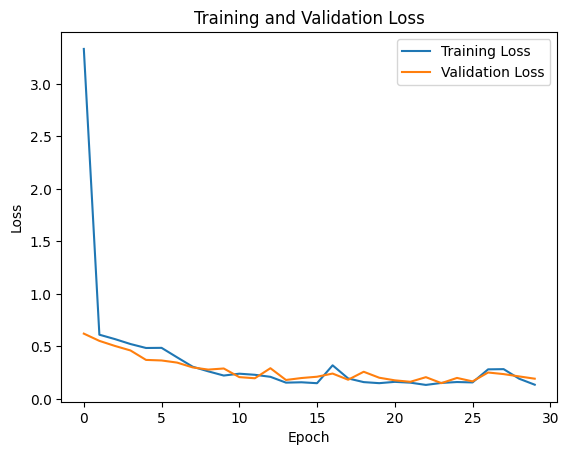

In [ ]:
model = create_custom_model()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(DATASET_PATH + "best_models/" + 'best_model_gen_7_1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint]
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## ConfusionMatrix



Found 24 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


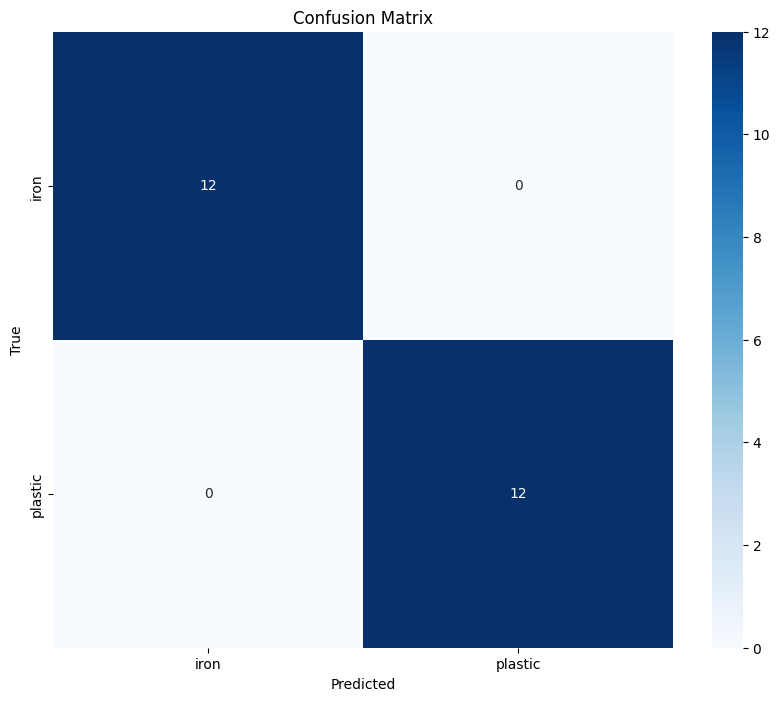

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Config
test_data_dir = 'test'
class_names = ['iron', 'plastic']
batch_size = 32

# Загрузка сохраненной модели
model = load_model(DATASET_PATH + "best_models/" + 'best_model_gen_7_1.h5')

# Создание генератора данных для тестовых изображений
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    DATASET_PATH + 'test/',
    target_size=(320, 240),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Получение предсказанных меток
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred).flatten().astype(int)  # Округляем вероятности до 0 или 1

# Фактические метки из генератора
y_true = test_generator.classes

# Создание матрицы ошибок
cm = confusion_matrix(y_true, y_pred_classes)

# Настройка визуализации
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()